# Application in software development reactivity

effect permet de faire (running effect)
- state : stock la valeur et les effets independants

In [ ]:
hp = State(100)
doubled = Derived(lambda: hp.value * 2)

@effect
def on_hp_change():
    if hp.value > 20:
        print("You have", hp.value, "HP")
    else:
        print("Careful! Only", hp.value, "HP left")
    print("Doubled value:", doubled.value)


hp.value = 90
hp.value = 70
hp.value = 15

In [ ]:
running = []
class State:
    def __init__(self, value):
        self._value = value
        self.subscribers = set()

    @property
    def value(self):
        if running:
            self.subscribers.add(running[-1])
        return self._value

    @value.setter
    def value(self, value):
        self._value = value
        for effect in self.subscribers:
            effect()

def effect(fn):
    def wrapped():
        running.append(wrapped)
        fn()
        running.pop()
    wrapped()

# Weighted graphs

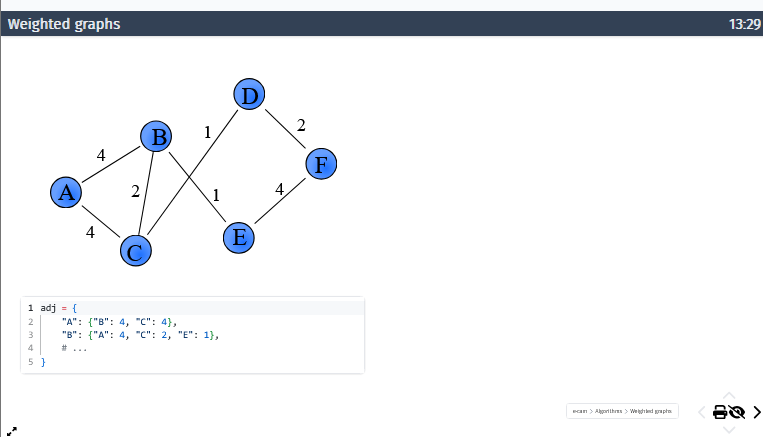

# Algorithm Dijkstra's 


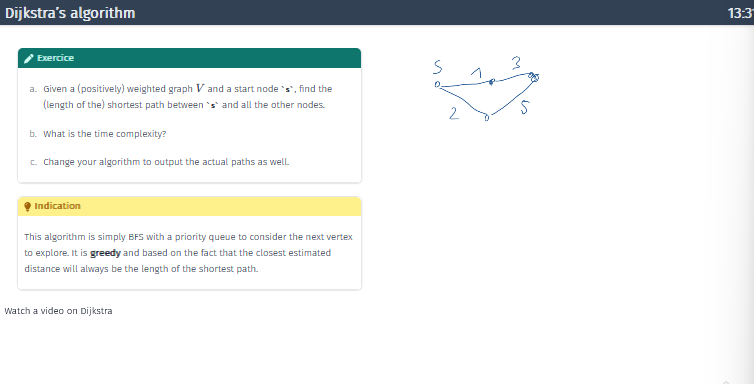

In [7]:
import heapq

def dijkstra(adj, start):
    # BFS to change so that it uses a priority queue
    dist = { u: float('inf') for u in adj}
    dist[start] = 0

    queue = [(0, start)] 
    while queue:
        # while V log V
        # take vertex with closest estimated distance 
        # it is correct
        node = heapq.heappop(queue) # log V

        # visit neighbour : todo
        # with while O(E)
        for neighbor in adj[node]:
            # O(log V)
            estimate = dist[node] + adj[node][neighbor]
            if estimate < dist[neighbor]:
                dist[neighbor] = estimate
                # log V
                heapq.heappush(queue, (estimate, neighbor))
    return dist

dijkstra({'A': {'B': 4, 'C': 1},
          'B': {},
          'C': {'B': 2}
          }, 'A')

KeyError: (0, 'A')

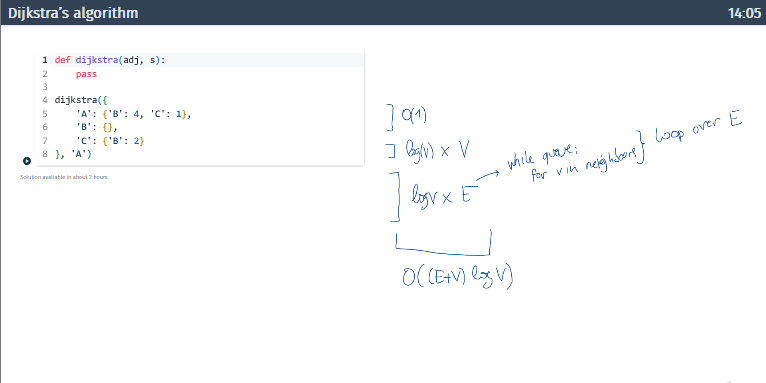

le but est de faire en sorte que qu'on a un tri partiel 

# Tri dynamique de bellman-ford

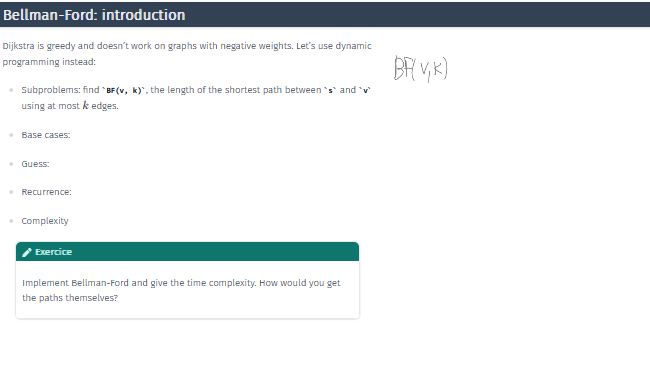

- le base case on a droit a prender de 0 a +inf : 

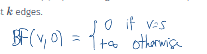

- le geuss on cherche a voir les chemins le plus cours et on minimise: 

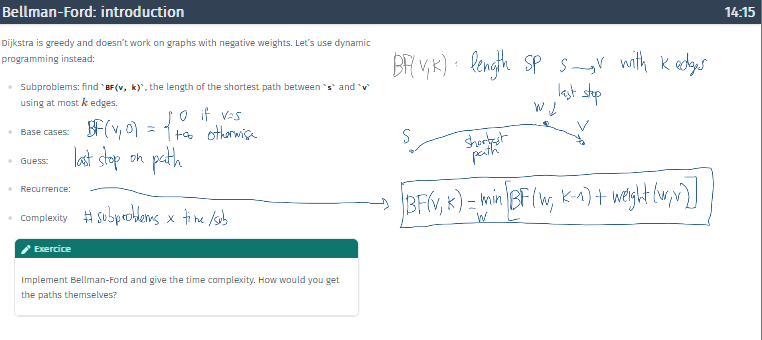

In [6]:
import functools
# * defait une liste
def bellman_ford(adj, start):
    dist = { u: float('inf') for u in adj}
    dist[start] = 0
    queue = [(0, start)] 
    @functools.cache
    def BF(v, k: int):
        # bases cases
        if k == 0:
            return 0 if v == k else float('inf')
        return min([
            BF(v, k-1),
            *[BF(u, k-1) + adj[u][v] for u in adj if v in adj[u]]
        ])
    
    return {v: BF(v, len(adj) - 1) for v in adj}
        # Guess

            
        # Recurrence
        # Complexity
        # sub v: O(v) k: O(v)
        #time / subproblem : O(v)
        # O(V)
        

bellman_ford({
    'A': {'B': 2, 'C': 4},
    'B': {'C': -2},
    'C': {}
}, 'A')




{'A': inf, 'B': inf, 'C': inf}

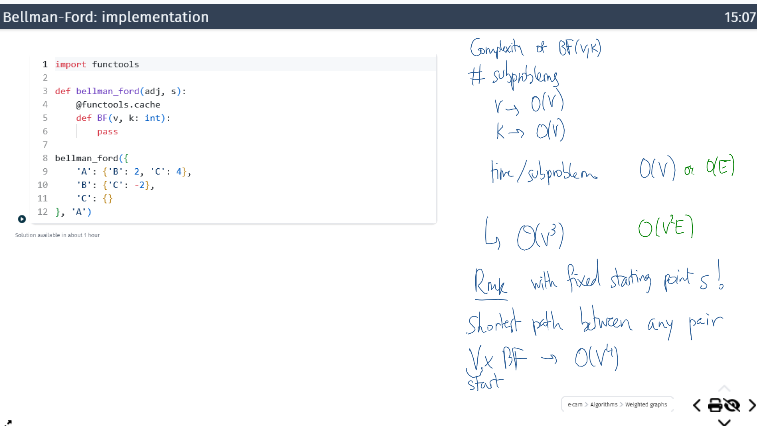

# Floyd-Warshall

In [5]:
import functools

def floyd_warshall(adj):
    V = list(adj.keys())
    @functools.cache
    def FW(u, v, k):
        # bases cases
        if u == v:
            return 0 if u==v & u==k else float('inf')
        return min([
            # fastet way 
            FW(u, v, k-1),
            # fasted way
            FW(u, V[k], k-1) + FW(V[k], v, k-1)
            ])
    return {(u, V): FW(u, v, len(V) - 1) for u in V for v in V}
        # Guess
        # Recurrence

floyd_warshall({
    'A': {'B': 2, 'C': 4},
    'B': {'C': -2},
    'C': {}
})

TypeError: unsupported operand type(s) for &: 'str' and 'str'

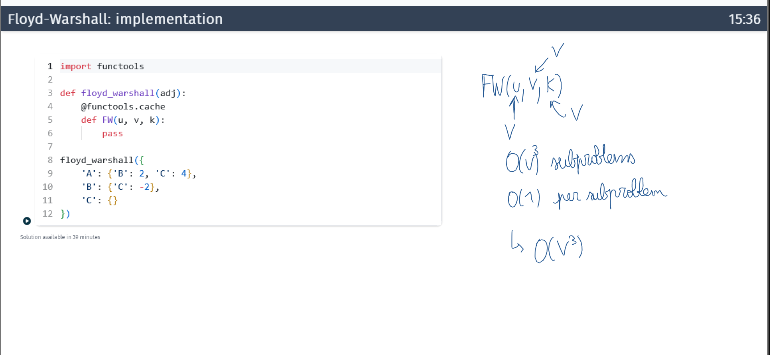

# Prim's algorithm

On prends en compte ce qu'il faut faire sans prendre des arretes qui crée des boucles.

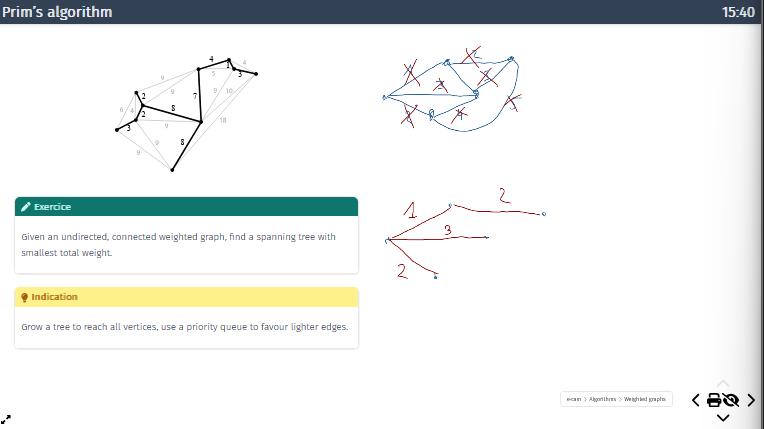

In [ ]:
def prim(adj, s):
    tree = [] # list of edges in the MST
    visited = set() # set of vertices in the MST
    queue = [(0, s, s)]  # (weight, vertex, start->vertex)
    while queue:
        weight, u, v = heapq.heappop(queue)
        if v in visited:
            continue
        visited.add(v)
        if u != v:
            tree.append((u, v))
        for neighbor, weight in adj[v].items():
            if neighbor not in visited:
                heapq.heappush(queue, (weight, v, neighbor))
    return tree
prim({
    0: {1: 1, 2: 4},
    1: {0: 1, 2: 2, 3: 6},
    2: {0: 4, 1: 2, 3: 3},
    3: {1: 6, 2: 3},
}, 0)


# complexité:# V log V + E log V = (V + E) log V

# 1 O(1) pour l'accès et la mise à jour des distances
# 2 O(V) pour initialiser la file de priorité avec tous les sommets
# 3 O(E) pour insérer tous les arcs dans la file de priorité
# 4 O((V + E) log V) pour extraire les arcs de la file de priorité et mettre à jour les distances


[(0, 1), (1, 2), (2, 3)]

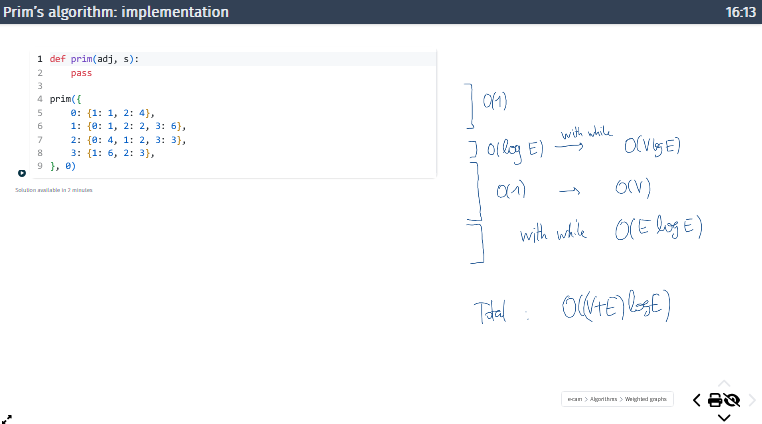